#### catatan link dari mas Handoyo
- https://github.com/t3981-h/BeautifulSoup-Capstone

- https://github.com/t3981-h/Webscrapping-with-BeautifulSoup/blob/master/Webscrapping%20using%20BeautifulSoup.ipynb

- https://github.com/t3981-h/Webscrapping-with-BeautifulSoup

#### link tugas 
- https://www.exchange-rates.org/history/IDR/USD/T

# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )

At this module we will learn on how do simple web scrapping using beautiful soup. Web scrapping is one of a method that we can use to colleting the data from internet. At this particular module, we will try to scrap from https://www.exchange-rates.org/history/IDR/USD/Tn. To do this we will only use a couple default library from python and BeautifulSoup.




## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [24]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [25]:
url_get.content[1:888]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.go'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [26]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [27]:
print(soup.prettify()[:12456])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [28]:
#table = soup.find(<div class="content container">
#  print(table.prettify()[1:500])

In [29]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/27/2020
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-27-2020">
     14,078.12448
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-27-2020">
     USD IDR rate for 11/27/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate


In [30]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/27/2020</td><td>Friday</td><td><a href="/Rate/USD/IDR/11-27-2020">14,078.12448</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-27-2020">USD IDR rate for 11/27/2020</a></td></tr>,
 <tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [31]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tgl = row.find_all('td')[0].text
    tgl = tgl.strip() #for removing the excess whitespace
    
    #get harga harian
    hargaharian = row.find_all('td')[2].text
    hargaharian = hargaharian.strip() #for removing the excess whitespace
    
    temp.append((tgl,hargaharian)) 
    
temp

[('11/26/2020', '14,090.70769 IDR'),
 ('11/25/2020', '14,136.09929 IDR'),
 ('11/24/2020', '14,137.48161 IDR'),
 ('11/23/2020', '14,185.57119 IDR'),
 ('11/20/2020', '14,162.60519 IDR'),
 ('11/19/2020', '14,165.50144 IDR'),
 ('11/18/2020', '14,051.29503 IDR'),
 ('11/17/2020', '14,040.16051 IDR'),
 ('11/16/2020', '14,085.69501 IDR'),
 ('11/13/2020', '14,142.77143 IDR'),
 ('11/12/2020', '14,141.24303 IDR'),
 ('11/11/2020', '14,073.46024 IDR'),
 ('11/10/2020', '14,053.76135 IDR'),
 ('11/9/2020', '14,283.29667 IDR'),
 ('11/6/2020', '14,214.49744 IDR'),
 ('11/5/2020', '14,389.14027 IDR'),
 ('11/4/2020', '14,544.44634 IDR'),
 ('11/3/2020', '14,589.01774 IDR'),
 ('11/2/2020', '14,612.89990 IDR'),
 ('10/30/2020', '14,629.16216 IDR'),
 ('10/29/2020', '14,701.62361 IDR'),
 ('10/28/2020', '14,701.92586 IDR'),
 ('10/27/2020', '14,649.78960 IDR'),
 ('10/26/2020', '14,652.88010 IDR'),
 ('10/23/2020', '14,655.04157 IDR'),
 ('10/22/2020', '14,647.90877 IDR'),
 ('10/21/2020', '14,641.61060 IDR'),
 ('10/2

In [32]:
temp = temp [::-1]
temp

[('5/31/2020', '14,664.14584 IDR'),
 ('6/1/2020', '14,586.73900 IDR'),
 ('6/2/2020', '14,382.27395 IDR'),
 ('6/3/2020', '14,060.78946 IDR'),
 ('6/4/2020', '14,113.82802 IDR'),
 ('6/5/2020', '14,305.96407 IDR'),
 ('6/7/2020', '13,989.39489 IDR'),
 ('6/8/2020', '13,867.95377 IDR'),
 ('6/9/2020', '13,870.75718 IDR'),
 ('6/10/2020', '13,976.91611 IDR'),
 ('6/11/2020', '13,966.85142 IDR'),
 ('6/12/2020', '14,121.55442 IDR'),
 ('6/14/2020', '14,145.23543 IDR'),
 ('6/15/2020', '14,021.62200 IDR'),
 ('6/16/2020', '14,046.73959 IDR'),
 ('6/17/2020', '14,120.02241 IDR'),
 ('6/18/2020', '14,095.36729 IDR'),
 ('6/19/2020', '14,077.63950 IDR'),
 ('6/21/2020', '14,068.55627 IDR'),
 ('6/22/2020', '14,136.05128 IDR'),
 ('6/23/2020', '14,148.27391 IDR'),
 ('6/24/2020', '14,143.17320 IDR'),
 ('6/25/2020', '14,130.57047 IDR'),
 ('6/26/2020', '14,190.21303 IDR'),
 ('6/28/2020', '14,185.08225 IDR'),
 ('6/29/2020', '14,183.53912 IDR'),
 ('6/30/2020', '14,296.90560 IDR'),
 ('7/1/2020', '14,256.13040 IDR'),
 

## Creating data frame & Data wrangling

Put the array into dataframe

In [33]:
import pandas as pd

df = pd.DataFrame(temp, columns=('tgl', 'hargaharian'))
df.head(15)

,tgl,hargaharian
0,5/31/2020,"14,664.14584 IDR"
1,6/1/2020,"14,586.73900 IDR"
2,6/2/2020,"14,382.27395 IDR"
3,6/3/2020,"14,060.78946 IDR"
4,6/4/2020,"14,113.82802 IDR"
5,6/5/2020,"14,305.96407 IDR"
6,6/7/2020,"13,989.39489 IDR"
7,6/8/2020,"13,867.95377 IDR"
8,6/9/2020,"13,870.75718 IDR"
9,6/10/2020,"13,976.91611 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [34]:
#cek tipe data
df.dtypes

tgl            object
hargaharian    object
dtype: object

In [35]:
#hilangkan satuan IDR
df['hargaharian'] = df['hargaharian'].str.replace("IDR","")
df.head()

,tgl,hargaharian
0,5/31/2020,"14,664.14584"
1,6/1/2020,"14,586.73900"
2,6/2/2020,"14,382.27395"
3,6/3/2020,"14,060.78946"
4,6/4/2020,"14,113.82802"


In [36]:
#hilangkan koma di 'harga harian' lalu ubah tipe data hargaharian menjadi tipe float64
df['hargaharian'] = df['hargaharian'].str.replace(",","").astype('float64')
df.head()


,tgl,hargaharian
0,5/31/2020,14664.14584
1,6/1/2020,14586.73900
2,6/2/2020,14382.27395
3,6/3/2020,14060.78946
4,6/4/2020,14113.82802


In [37]:
#cek tipe data kembali
df.dtypes

tgl             object
hargaharian    float64
dtype: object

In [38]:
#ubah tipe data 'tgl'
df['tgl'] = df['tgl'].astype('datetime64')

In [39]:
df.dtypes


tgl            datetime64[ns]
hargaharian           float64
dtype: object

In [40]:
df.head(20)

,tgl,hargaharian
0,2020-05-31,14664.14584
1,2020-06-01,14586.73900
2,2020-06-02,14382.27395
3,2020-06-03,14060.78946
4,2020-06-04,14113.82802
5,2020-06-05,14305.96407
6,2020-06-07,13989.39489
7,2020-06-08,13867.95377
8,2020-06-09,13870.75718
9,2020-06-10,13976.91611


<AxesSubplot:>

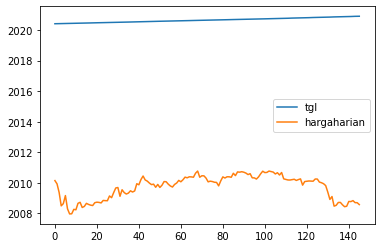

In [41]:
df.plot()

<AxesSubplot:title={'center':'Nilai Tukar USD/IDR'}, xlabel='tgl'>

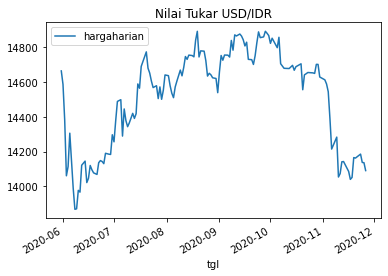

In [42]:
df.set_index('tgl').plot(title='Nilai Tukar USD/IDR')

In [43]:
df['hargaharian'].max()

14892.32194

In [44]:
df.max()

tgl            2020-11-26 00:00:00
hargaharian                14892.3
dtype: object

In [22]:
df.describe()

,hargaharian
count,146.000000
mean,14514.333568
std,280.428023
min,13867.953770
25%,14262.921967
50%,14616.820355
75%,14730.218907
max,14892.321940


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tgl          146 non-null    datetime64[ns]
 1   hargaharian  146 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


### Analisis Data

Nilai tukar Rupiah terhadap dollar Amerika Serikat (USD) mengalami fluktuasi cukup tajam dalam enam (6) bulan terakhir. Sejak akhir Mei 2020, Rupiah bergerak di kisaran Rp 14.600 per dollar AS. Menjelang awal Juni 2020, Rupiah menguat di kisaran Rp 14.200 per dollar AS. Di bulan-bulan berikutnya nilai tukar Rupiah terhadap USD mulai mengalami pelemahan menembus level Rp 14.892 per dollar AS pada bulan November 2020. Dilansir dari situs berita Antara (18/11), Kepala Riset dan Edukasi Monex Investindo  menyebutkan bahwa kondisi demikian terjadi karena ada sentimen positif dan negatif di pasar keuangan. Sentimen positif karena progress pengembangan vaksin Covid-19, sementara sentimen negatif kekhawatiran pasar seiring dengan peningkatan kasus Covid-19 akan memicu pelambatan pertumbuhan ekonomi nasional. 

sumber : https://www.liputan6.com/bisnis/read/4411317/rupiah-melemah-di-tengah-beragam-sentimen-global-dan-internal, retrieved 29 Nov 2020


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Nilai Tukar USD/IDR'}, xlabel='tgl'>

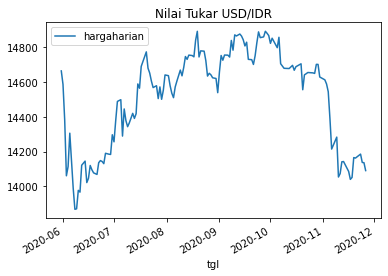

In [92]:
df.set_index('tgl').plot(title='Nilai Tukar USD/IDR')


(Put your analysis and conclusion here.)

### Analisis Data

Nilai tukar Rupiah terhadap dollar Amerika Serikat (USD) mengalami fluktuasi cukup tajam dalam enam (6) bulan terakhir. Sejak akhir Mei 2020, Rupiah bergerak di kisaran Rp 14.600 per dollar AS. Menjelang awal Juni 2020, Rupiah menguat di kisaran Rp 14.200 per dollar AS. Di bulan-bulan berikutnya nilai tukar Rupiah terhadap USD mulai mengalami pelemahan menembus level Rp 14.892 per dollar AS pada bulan November 2020. Dilansir dari situs berita Antara (18/11), Kepala Riset dan Edukasi Monex Investindo  menyebutkan bahwa kondisi demikian terjadi karena ada sentimen positif dan negatif di pasar keuangan. Sentimen positif karenaadanya harapan dari progress pengembangan vaksin Covid-19, sementara sentimen negatif kekhawatiran pasar seiring dengan peningkatan kasus Covid-19 akan memicu pelambatan pertumbuhan ekonomi nasional. 

sumber : https://www.liputan6.com/bisnis/read/4411317/rupiah-melemah-di-tengah-beragam-sentimen-global-dan-internal, retrieved 29 Nov 2020


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.